## Домашнее задание Lesson2

Обучить линейную регрессию, построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок) для датасета сталей и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
df = pd.read_csv("Steels_kaggle.csv")
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


<Axes: >

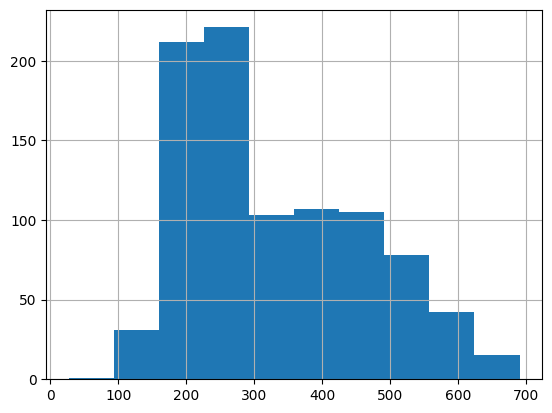

In [5]:
df[" 0.2% Proof Stress (MPa)"].hist()

Обучим линейную регрессию, чтобы по составу и температуре предсказывать предел текучести

In [193]:
cols = df.columns
y = df[cols[16]]
x = df.drop(np.hstack([cols[16:], cols[0]]), axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=49)

In [194]:
# отмасштабируем данные для LR
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [195]:
# LR
lr = SGDRegressor(penalty="l1")
lr.fit(x_train, y_train)

SGDRegressor(penalty='l1')

mse=2660.6223095895916
mape=0.12919182371976545


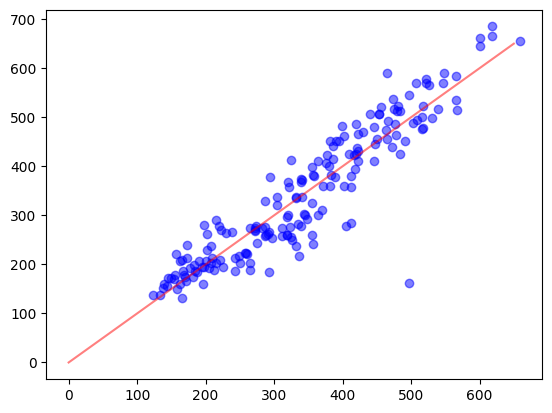

In [197]:
y_pred = lr.predict(x_test)

mse_loss = mse(y_pred, y_test)
mape_loss = mape(y_test, y_pred)
print(f"mse={mse_loss}\nmape={mape_loss}")

plt.plot(y_pred, y_test, 'bo', np.linspace(0, 650, 100), np.linspace(0, 650, 100), 'r', alpha=0.5)

In [7]:
for i in zip(cols[1:16], lr.coef_):
    print(i)

(' C', 5.43552598242767)
(' Si', 11.527629005445442)
(' Mn', 18.619836464683356)
(' P', -5.073091414334456)
(' S', -0.8081968328178503)
(' Ni', 20.27774292565747)
(' Cr', 4.638775468592294)
(' Mo', 41.54377755491161)
(' Cu', 0.14852853570920016)
('V', 47.087277481944085)
(' Al', 5.996233712516721)
(' N', -7.699763096994282)
('Ceq', 45.03807723194744)
('Nb + Ta', 9.227047645217754)
(' Temperature (°C)', -64.36000274207727)


Попробуем обучить модель без одного из признаков

In [8]:
cols = df.columns
y = df[cols[16]]

for i in range(1, 16):
    x = df.drop(np.hstack([cols[16:], cols[0], cols[i]]), axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=49)
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    lr = SGDRegressor(penalty="l1")
    lr.fit(x_train, y_train)
    
    y_pred = lr.predict(x_test)
    print(f"feat={cols[i]}, mse={mse(y_pred, y_test)}")

feat= C, mse=2728.0232842203836
feat= Si, mse=2729.6548118059786
feat= Mn, mse=2785.1052707276235
feat= P, mse=2679.319110961798
feat= S, mse=2671.8108529498445
feat= Ni, mse=2700.3540559446546
feat= Cr, mse=2677.8867702641983
feat= Mo, mse=3067.3333156749304
feat= Cu, mse=2714.7865943521856
feat=V, mse=2868.3216070224016
feat= Al, mse=2646.5915629801707
feat= N, mse=2663.2398341299263
feat=Ceq, mse=3193.74949389183
feat=Nb + Ta, mse=2722.779796087374
feat= Temperature (°C), mse=6391.338668776111


## Домашнее задание Lesson 7

Обучить нейронную сеть для предсказания предела текучести (0.2% Proof Stress (MPa)) сталей на основании состава и температуры. Для этого подобрать наилучшим образом ее гиперпаметры (количество слоев, количество нейронов в слое, функции активации) построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок). Сравнить точность с ранее обученными моделями

In [2]:
df = pd.read_csv("Steels_kaggle.csv")
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [3]:
cols = df.columns
y = df[cols[16]]
x = df.drop(np.hstack([cols[16:], cols[0]]), axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=49)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
import torch
from torch.utils.data import DataLoader, Dataset, Subset, TensorDataset
from torch import nn
from torch.nn import functional as F
import time

In [74]:
x_train_torch = torch.tensor(x_train, dtype=torch.float32)
y_train_torch = torch.tensor(np.array(y_train), dtype=torch.float32)
x_test_torch = torch.tensor(x_test, dtype=torch.float32)
y_test_torch = torch.tensor(np.array(y_test), dtype=torch.float32)
train_dataset = TensorDataset(x_train_torch, y_train_torch)
test_dataset = TensorDataset(x_test_torch, y_test_torch)

In [76]:
x_train_torch.shape

torch.Size([732, 15])

In [177]:
batch_size = 732
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=183, shuffle=True)

In [178]:
def train_model(model, train_loader, test_loader, loss_fn, opt, n_epochs: int):
    train_loss = []
    val_loss = []
    start_time = time.time()
    
    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []

        model.train(True)
        for X_batch, y_batch in train_loader:
            outputs = torch.reshape(model(X_batch), (-1,))
            loss = loss_fn(outputs, y_batch)
            loss.backward()
            opt.step()
            opt.zero_grad()
            ep_train_loss.append(loss.item())

        model.train(False)
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                ep_val_loss.append(loss_fn(torch.reshape(model(X_batch), (-1,)), y_batch).item())

        #print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        
        #print(f"\t  training loss: {train_loss[-1]:.6f}")
        #print(f"\tvalidation loss: {val_loss[-1]:.6f}")
    print(f"{time.time() - start_time:.3f}")
    return train_loss, val_loss

In [179]:
act_func = [nn.ReLU(), nn.LeakyReLU(), nn.Tanh(), nn.Sigmoid()]
name_func = ["relu", "leaky-relu", "tanh", "sigmoid"]
TRAIN = []
TEST = []
n_epochs = 15000
for i, f in enumerate(act_func): 
    model = nn.Sequential(
        nn.Linear(15, 7),
        f,
        nn.Linear(7,1),
    )
    loss_func = nn.MSELoss()
    opt = torch.optim.Adam(model.parameters(), lr=1e-2)
    train_loss, val_loss = train_model(model, train_loader, test_loader, loss_func, opt, n_epochs)
    TRAIN.append(train_loss)
    TEST.append(val_loss) 

83.191
83.183
85.496
88.341


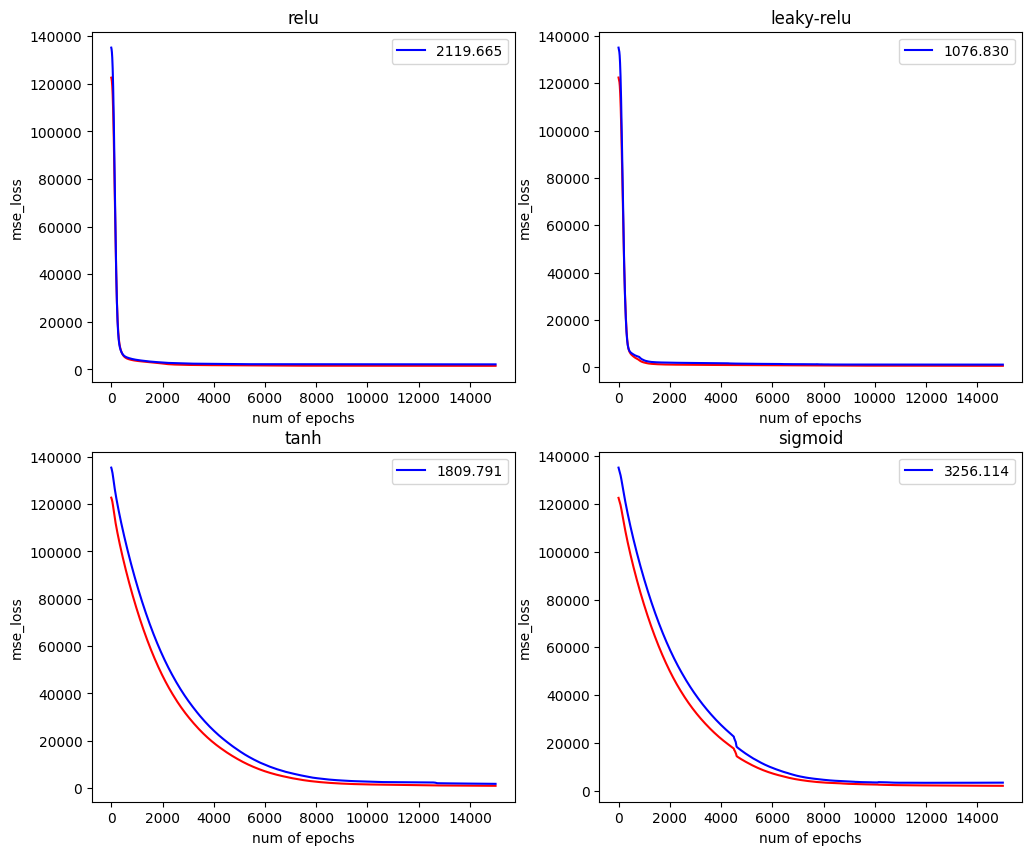

In [180]:
plt.figure(figsize=(12, 10))
for i in range(0, 4):
    plt.subplot(2, 2, 1+i)
    plt.plot(np.arange(0, n_epochs), TRAIN[i], color="red")
    plt.plot(np.arange(0, n_epochs), TEST[i], color="blue", label=f"{min(TEST[i]):.3f}")
    plt.title(name_func[i])
    plt.xlabel("num of epochs")
    plt.ylabel("mse_loss")
    plt.legend()

In [183]:
act_func = [nn.ReLU(), nn.LeakyReLU(), nn.Tanh(), nn.Sigmoid()]
act_func2 = [nn.ReLU(), nn.LeakyReLU(), nn.Tanh(), nn.Sigmoid()]
name_func = ["relu", "leaky-relu", "tanh", "sigmoid"]
TRAIN = []
TEST = []
n_epochs = 20000
for i, f in enumerate(act_func): 
    model = nn.Sequential(
        nn.Linear(15, 10),
        f,
        nn.Linear(10,5),
        act_func2[i],
        nn.Linear(5, 1)
    )
    loss_func = nn.MSELoss()
    opt = torch.optim.Adam(model.parameters(), lr=1e-2)
    train_loss, val_loss = train_model(model, train_loader, test_loader, loss_func, opt, n_epochs)
    TRAIN.append(train_loss)
    TEST.append(val_loss) 

115.244
111.357
113.463
131.014


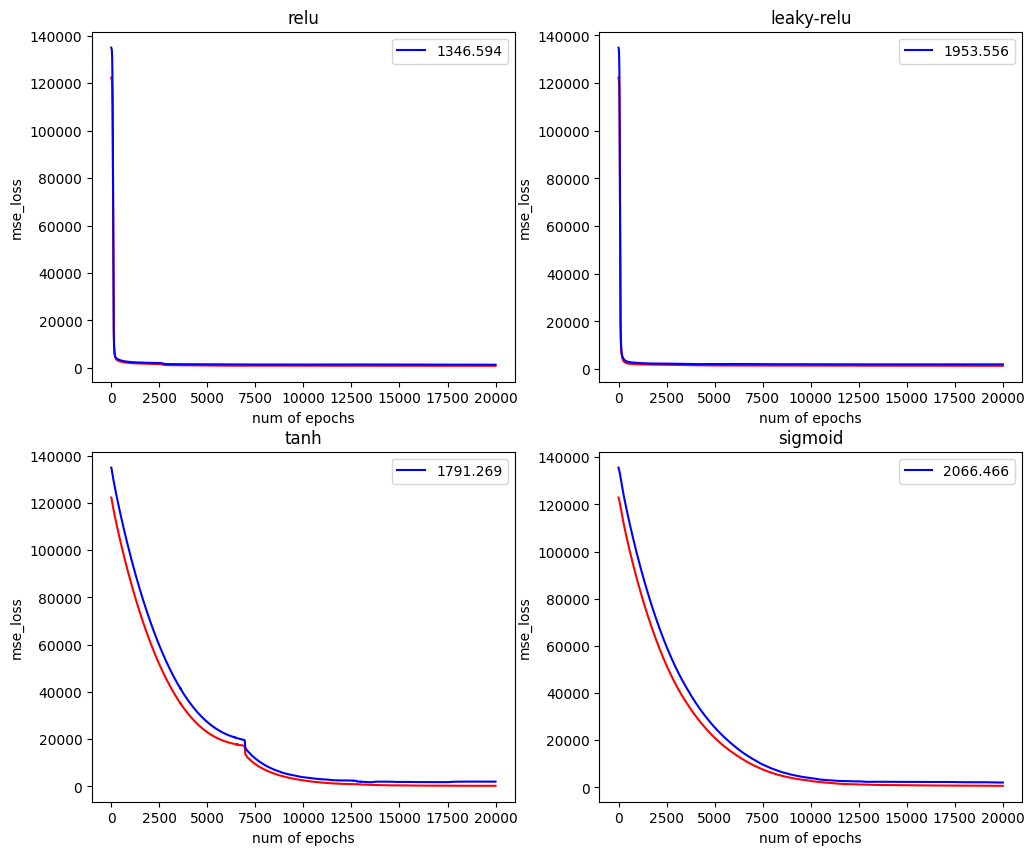

In [184]:
plt.figure(figsize=(12, 10))
for i in range(0, 4):
    plt.subplot(2, 2, 1+i)
    plt.plot(np.arange(0, n_epochs), TRAIN[i], color="red")
    plt.plot(np.arange(0, n_epochs), TEST[i], color="blue", label=f"{min(TEST[i]):.3f}")
    plt.title(name_func[i])
    plt.xlabel("num of epochs")
    plt.ylabel("mse_loss")
    plt.legend()

In [185]:
model = nn.Sequential(
        nn.Linear(15, 7),
        nn.LeakyReLU(),
        nn.Linear(7,1),
    )
loss_func = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-2)
n_epochs = 20000
for epoch in range(n_epochs):
    model.train(True)
    for X_batch, y_batch in train_loader:
        outputs = torch.reshape(model(X_batch), (-1,))
        loss = loss_func(outputs, y_batch)
        loss.backward()
        opt.step()
        opt.zero_grad()

mse=1046.8150818772076
mape=0.0708215116569756


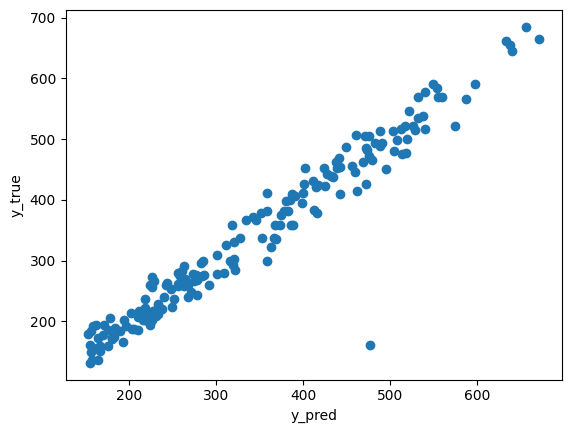

In [199]:
output = torch.reshape(model(x_test_torch), (-1,)).detach()
plt.scatter(output, y_test)
plt.xlabel("y_pred")
plt.ylabel("y_true")
mse_error = mse(output, y_test)
mape_error = mape(y_test, output)
print(f"mse={mse_error}\nmape={mape_error}")

Итоги для mape: LR=0.13; NN=0.07, SVR(kernel=rbf)=0.06, LR-for-polynom-feat=0.09